# (0)&emsp;Imports and datasets initialisation

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)
    

from src.pycogra.mismatch.ie import import_from_json, init_dataset
from src.pycogra.mismatch.objetcs import MismatchHandler
from src.pycogra.mismatch.plot import plot_single_dataset, barplot_instances, dataset_subfigures
dir_dataset: str = "datasets/"

dataset_cd: dict = {'swat.a3': dir_dataset + "swat-a3.json",
                    'cicids.17': dir_dataset + "cicids-17.json"}
mh_cd_l, dataset_cd_labels = init_dataset(dataset_in=dataset_cd)
    
dataset_ad = dir_dataset + 'swat-a6.json'
mh_ad: MismatchHandler = import_from_json(file_mismatch=dataset_ad)

    
rule_set_valid_l = ['addr', 'src', 'dst', 'tr', 'pr', 'pdu']
rule_set_combined = {'a0': ['all'],
                     'a1': ['dev', 'com'],
                     'a2-dev': ['addr', 'src', 'dst'],
                     'a2-com': ['tr', 'pr', 'pdu'],
                     'a2-dev-com': ['addr', 'src', 'dst', 'com']}

def check_rule_set(r) -> list:        
    if isinstance(r, list):
        for e in r:
            if e not in rule_set_valid_l:
                return rule_set_valid_l
        return r
        
    if r in rule_set_combined:
        return rule_set_combined[r]
    elif r in rule_set_valid_l:
        return [r]
    
    return rule_set_valid_l

# (1)&emsp;Communication dynamics analaysis

## (1.1)&emsp;Single dataset analysis

The following cell enables the analysis of the communication dynamics of a single dataset. The diagram shows the mismatching packet rates achieved per sub-step of the whitelist generation. For further information, please refer to §5 of the paper.

The variables of the next cell can be used to adjust the chart as follows:
- `dataset_cda`: Selection of the dataset. Please choose either 'swat.a3' or 'cicids.17'.
- `rule_set`: Selection of rules whose influence on logging of whitelist mismatching packets should be taken into account. Please use this variable as follows:
    - List of individual rule sets. These correspond to the rule sets explained in §3.2 of the paper:
        - `addr`: Rule to detect new/unknown devices that are involved in packet transmission. This corresponds to the rule r<sub>U</sub>.
        - `src`: Rule set to detect new sending devices out of the set of already known devices (R<sub>K<sub>src</sub></sub>).
        - `dst`: Rule set to detect senders out of the set of known devices addressing additional devices (R<sub>K<sub>dst</sub></sub>).
        - `tr`: Rule set to detect the use of new transport-oriented protocols within an existing source-destination relation (R<sub>T</sub>).
        - `pr`: Rule set to detect the use of new application-oriented protocols within an existing source-destination relation (R<sub>P</sub>).
        - `pdu`: Rule set to detect the use of new protocol-specific message types within an existing source-destination relation (R<sub>U</sub>).
    - String to indicate a predefined list of rule sets:
        - `a0`: Complete rule set, without any distinctions made between the different rule sets.
        - `a1`: Complete rule set, with the distinction between device-oriented and communication-oriented rules.
        - `a2-dev`: Device-oriented rules with differentiation between r<sub>U</sub>, R<sub>K<sub>src</sub></sub> and R<sub>K<sub>dst</sub></sub>.
        - `a2-com`: Communication-oriented rules with differentiation between R<sub>T</sub>, R<sub>P</sub> and R<sub>U</sub>.

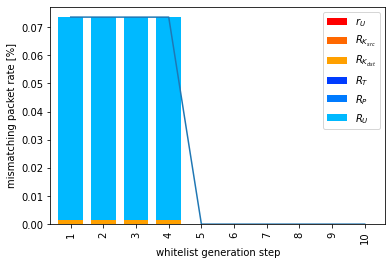

In [2]:
dataset_cda = 'swat.a3'
rule_set = ['addr', 'src', 'dst', 'tr', 'pr', 'pdu']
#rule_set = 'a2-dev'

rule_set = check_rule_set(rule_set)
mh_cda: MismatchHandler = import_from_json(file_mismatch=dataset_cd[dataset_cda])

g = plot_single_dataset(data_in=mh_cda, plot_elems=rule_set, notebook=True)

## (1.2)&emsp;Investigate whitelist mismatching communication

The following cell allows a targeted investigation of the dataset (defined in 1.1) with respect to the communication aspects that lead to the whitelist violation. For this, the diagram provides information about the packets logged by the specified rule set. The following options for configuration are available:
- `rule_set`: String to specify the rule set to be applied. Please use one option from `addr`, `src`, `dst`, `pr`, `tr` or `pdu`. See cell 1.1 for further information on the meaning of these values.
- `wl_generation_step`: The packets that were logged by the whitelist generated after the sub-step specified with `wl_generation_step` are shown in the diagram. Since the whitelist was generated in ten sub-steps, integer values between 0-9 are possible.

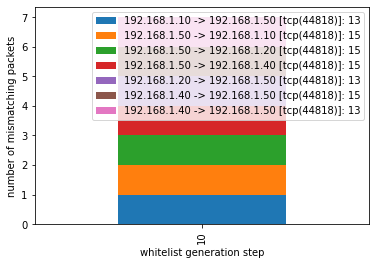

In [3]:
rule_set: str = 'pdu'
wl_generation_step: list = [9]

rule_set = check_rule_set(rule_set)
df = barplot_instances(data_in=mh_cda, instance_key=rule_set[0], instance_index=wl_generation_step, notebook=True)

## (1.3)&emsp;Multiple dataset comparison

The cell below aim a comparison between the mismatching packet rate evolution of the two public datasets used for communication dynamics analysis (see §5 of the paper). The plot can be customised as follows:
- `result_sets`: List of lists, each list defining a set of rules to be considered for determining the MPR. Analogous to Figure 4 of the paper, a comparison of the MPR evolution with and without consideration of the message-type-specific rules is realised with the default values contained in the cell. In the case of a customised rule set, see cell 1.1 for information on the possible values `addr`, `src`, `dst`, `tr`, `pr` and `pdu`.

/home/ap/.local/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/ap/.local/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/ap/.local/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/ap/.local/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecatio

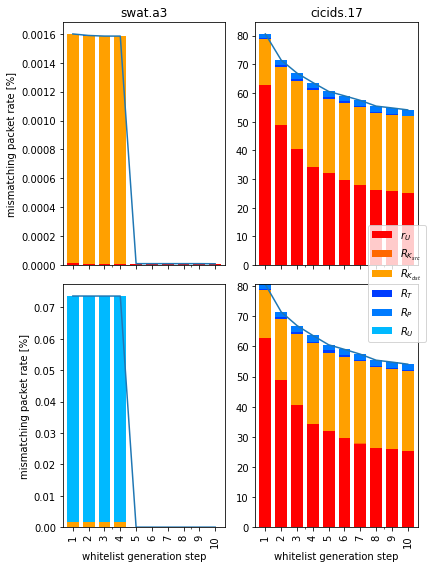

In [4]:
rule_sets = [['addr', 'src', 'dst', 'tr', 'pr'], 
             ['addr', 'src', 'dst', 'tr', 'pr', 'pdu']]

dataset_subfigures(data_in=mh_cd_l, labels=dataset_cd_labels, plot_elems_l=rule_sets, notebook=True)

# (2)&emsp;Attack detection capability

This section presents the analysis of the attack detection capability (explained in §6.1 of the paper) using the SWaT A6 dataset.

## (2.1)&emsp;Dataset description

The following table is based on the file **A6_Log.docx** provided by iTrust as part of the A6 dataset description. The first column corresponds to the notations of the sub-captures plotted by the next cells.

**Please note** that the communication whitelist is generated out of the sub-capture *c0*.


| Name  	| Time 	| Event                                                                   	|
|-------	|------	|-------------------------------------------------------------------------	|
| _c0_    	| 1005 	| Capture pre-attack pcap for 15 mins                                     	|
| _c1_    	| 1020 	| Capture pcap for actual attack in 15 mins intervals                     	|
|       	| 1020 	| Infiltrate SCADA WS via USB thumb drive with first malware              	|
| _c2_    	| 1030 	| Exfiltrate Historian Data                                               	|
|       	| 1035 	| Sleep                                                                   	|
| _c3_    	| 1045 	| Exfiltrate Historian Data                                               	|
|       	| 1050 	| Sleep                                                                   	|
| _c4_    	| 1100 	| Exfiltrate Historian Data                                               	|
|       	| 1105 	| Sleep                                                                   	|
| _c5_    	| 1115 	| Exfiltrate Historian Data                                               	|
|       	| 1120 	| Sleep                                                                   	|
| _c6-c9_ 	| 1130 	| Rest 60 mins                                                            	|
| _c10_    	| 1230 	| Infiltrate SCADA WS with second malware, via downloading from C2 server 	|
|       	|      	| Disrupt Sensor and Actuator                                             	|
|       	| 1233 	| Sleep                                                                   	|
|       	| 1243 	| Disrupt Sensor and Actuator                                             	|
| _c11_    	| 1246 	| Sleep                                                                   	|
|       	| 1256 	| Disrupt Sensor and Actuator                                             	|
|       	| 1259 	| Sleep                                                                   	|
| _c12_    	| 1309 	| Disrupt Sensor and Actuator                                             	|
|       	| 1312 	| Sleep                                                                   	|
| _c13_    	| 1322 	| Disrupt Sensor and Actuator                                             	|
|       	| 1325 	| Sleep                                                                   	|
| _c14_    	| 1330 	| Stop actual attack pcap capture                                         	|
|       	|      	| Capture post-attack pcap for 15 mins                                    	|
|       	| 1345 	| Stop post attack pcap capture                                           	|
|       	|      	| RAM memory dump using FTKImager, extract when done                      	|
|       	|      	| Extract Historian .csv files                                            	|
|       	|      	| Extract malware .exe file for both attacks                              	|
|       	|      	| Extract VM image (.vmdk) of both SCADA WS and C2 server                 	|
|       	|      	| Extract capture pcap files from external monitoring VM                  	|


## (2.2)&emsp;Representation of the MPRs of the individual sub-records

The following cell generates a plot to show the mismatching packet rates that resulted from analyzing the sub-records _c1-c14_ where attacks were performed (see the description of the dataset in cell 2.1).

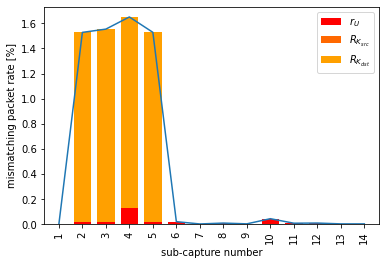

In [5]:
rule_set = 'a2-dev'

rule_set = check_rule_set(rule_set)
g = plot_single_dataset(data_in=mh_ad, plot_elems=rule_set, notebook=False)

## (2.3)&emsp;Investigate whitelist mismatching communication

Analogous to cell 1.2, communication that does not match the whitelist can be examined in more detail here. With the values given below, information on packets detected by the rule set R<sub>K<sub>src</sub></sub> (`rule_set = 'dst'`) is presented for sub-capture _c2_ (`sub_capture = [1]`). As explained in §6.1.2 of the paper, the packets presented are mostly part of the communication between the SCADA workstation _(192.168.1.201)_ and the historian _(192.168.1.219)_ for polling and transmitting the process values.

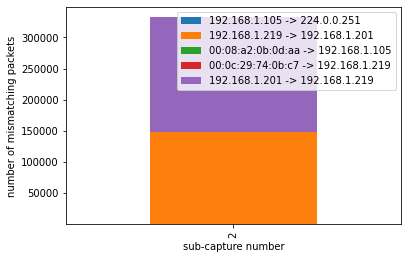

In [6]:
rule_set: str = 'dst'
sub_capture: list = [1]

rule_set = check_rule_set(rule_set)
df = barplot_instances(data_in=mh_ad, instance_key=rule_set[0], instance_index=sub_capture, notebook=True)